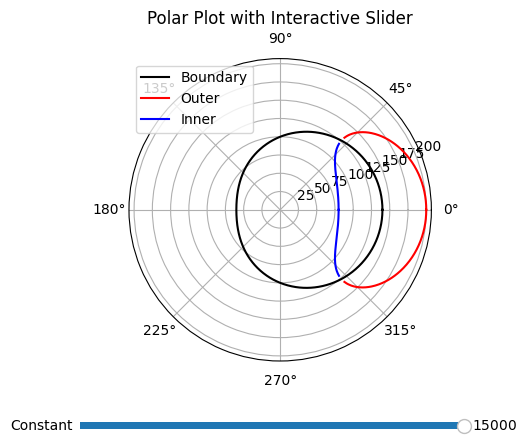

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Define theta values
theta = np.linspace(0, 2 * np.pi, 1000)

# Initial constant value
initial_const = 16000

# Compute r0
r0 = 100 + 40 * np.cos(theta)

def update(val):
    """Update function for the slider."""
    constant = slider.val
    radicand = r0**2 - constant
    valid_indices = radicand >= 0
    r1 = np.full_like(r0, np.nan)
    r2 = np.full_like(r0, np.nan)
    r1[valid_indices] = r0[valid_indices] + np.sqrt(radicand[valid_indices])
    r2[valid_indices] = r0[valid_indices] - np.sqrt(radicand[valid_indices])
    
    # Update plots
    outer_plot.set_ydata(r1)
    inner_plot.set_ydata(r2)
    plt.draw()

# Initial computation
radicand = r0**2 - initial_const
valid_indices = radicand >= 0
r1 = np.full_like(r0, np.nan)
r2 = np.full_like(r0, np.nan)
r1[valid_indices] = r0[valid_indices] + np.sqrt(radicand[valid_indices])
r2[valid_indices] = r0[valid_indices] - np.sqrt(radicand[valid_indices])

# Create plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.subplots_adjust(bottom=0.25)
ax.plot(theta, r0, label='Boundary', color='black')
outer_plot, = ax.plot(theta, r1, label='Outer', color='red')
inner_plot, = ax.plot(theta, r2, label='Inner', color='blue')
ax.legend()
ax.set_title("Polar Plot with Interactive Slider")

# Create slider axis and widget
ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])
slider = Slider(ax_slider, 'Constant', 1000, 15000, valinit=initial_const)
slider.on_changed(update)

plt.show()
